# 18CSE355T Data Mining and Analytics
##  Mini Project Work SRMIST,Chennai
## Team Members :  
###                 RAIMAN SINGH (RA2011003010274)
###                 SHYAM PRATAP SINGH RATHORE (RA2011003010286)
###                 LIGANDRO SINGH YUMNAM (RA2011003010305)

### Introduction
 In this work, we present analytical results obtained by data mining on the START (Study of Terrorism and Response to Terrorism) dataset. The main objective is to visualize terrorism data and make it available to users in an easy to understand format.
 
Lack of understanding and awareness about global terrorism leads to diverse opinions and common misconceptions among civilians. In this age of globalization, sufficient information about this topic can help strengthen our counter-terrorism strategies, improvise security concerns, regulate better economic policies and enhance the knowledge base of civilians.

In [2]:
#Importing packages
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import plotly.express as px

### About Data-Set
The primary dataset used in this project is called START (Study Terrorism and Response to Terrorism) dataset [3] which is a part of the Global Terrorism Database, compiled by the START consortium. START dataset is an unclassified, open-sourced, freely available dataset for anyone to use and has the most comprehensive collection of terrorist events among all other available datasets.

In [4]:
#Loading Dataset
data = pd.read_csv('/Users/ligandrosy/Downloads/dm.csv',encoding='ISO-8859-1')


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


### Objective
The main objective of this project is to identify dependent factors of terrorism. There are parameters like religion or nationalism which are not defined in the dataset but have a major influence on contemporary terrorism.
Religion has been a very controversial topic among researchers about whether religion influences terrorism or not and if it does, up to what extent.

### -Data Preprocessing

In [9]:
#Selecting Columns
data = data[['iyear','country_txt','city','region_txt','attacktype1_txt','weaptype1_txt','targtype1_txt', 'gname']]
data.head()

,iyear,country_txt,city,region_txt,attacktype1_txt,weaptype1_txt,targtype1_txt,gname
0,1970,Dominican Republic,Santo Domingo,Central America & Caribbean,Assassination,Unknown,Private Citizens & Property,MANO-D
1,1970,Mexico,Mexico city,North America,Hostage Taking (Kidnapping),Unknown,Government (Diplomatic),23rd of September Communist League
2,1970,Philippines,Unknown,Southeast Asia,Assassination,Unknown,Journalists & Media,Unknown
3,1970,Greece,Athens,Western Europe,Bombing/Explosion,Explosives,Government (Diplomatic),Unknown
4,1970,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,Incendiary,Government (Diplomatic),Unknown


In [10]:
#Renaming Columns
data=data.rename(columns = {'iyear':'Year','country_txt':'Country','city':'City','region_txt':'Region','attacktype1_txt':'Attack_Type','weaptype1_txt':'Weapon_Type',
                            'targtype1_txt':'Target_Type','gname':'Affiliation'})
data.head()

,Year,Country,City,Region,Attack_Type,Weapon_Type,Target_Type,Affiliation
0,1970,Dominican Republic,Santo Domingo,Central America & Caribbean,Assassination,Unknown,Private Citizens & Property,MANO-D
1,1970,Mexico,Mexico city,North America,Hostage Taking (Kidnapping),Unknown,Government (Diplomatic),23rd of September Communist League
2,1970,Philippines,Unknown,Southeast Asia,Assassination,Unknown,Journalists & Media,Unknown
3,1970,Greece,Athens,Western Europe,Bombing/Explosion,Explosives,Government (Diplomatic),Unknown
4,1970,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,Incendiary,Government (Diplomatic),Unknown


In [11]:
#Dropping duplicate rows and keeping the first duplicate row
data = data.drop_duplicates(keep='first')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128545 entries, 0 to 181690
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Year         128545 non-null  int64 
 1   Country      128545 non-null  object
 2   City         128315 non-null  object
 3   Region       128545 non-null  object
 4   Attack_Type  128545 non-null  object
 5   Weapon_Type  128545 non-null  object
 6   Target_Type  128545 non-null  object
 7   Affiliation  128545 non-null  object
dtypes: int64(1), object(7)
memory usage: 8.8+ MB


## -1)Number Of Terrorist Attacks Each Year

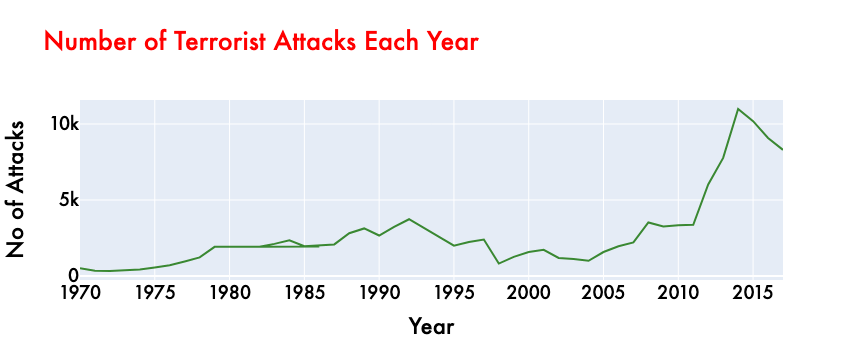

In [32]:
# import graph objects as "go"
import plotly.graph_objs as go

# Creating trace1
trace1 = go.Scatter(
                    x = data3.Year,
                    y = data3.YearCount,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))

layout = dict(title = 'Number of Terrorist Attacks Each Year',
              xaxis= dict(title= 'Year',tickangle = 0),yaxis= dict(title= 'No of Attacks',tickangle = 0)
             )
plot = go.Figure(data = trace1,layout = layout)


plot.update_layout(
    font_family="Futura",
    title_font_family="Futura",
    title_font_color="red",
    legend_title_font_color="green",
    font=dict(
        size=18,
        color="Black"
    )
)

plot.show()

## -2)Terrorist Attacks by Region

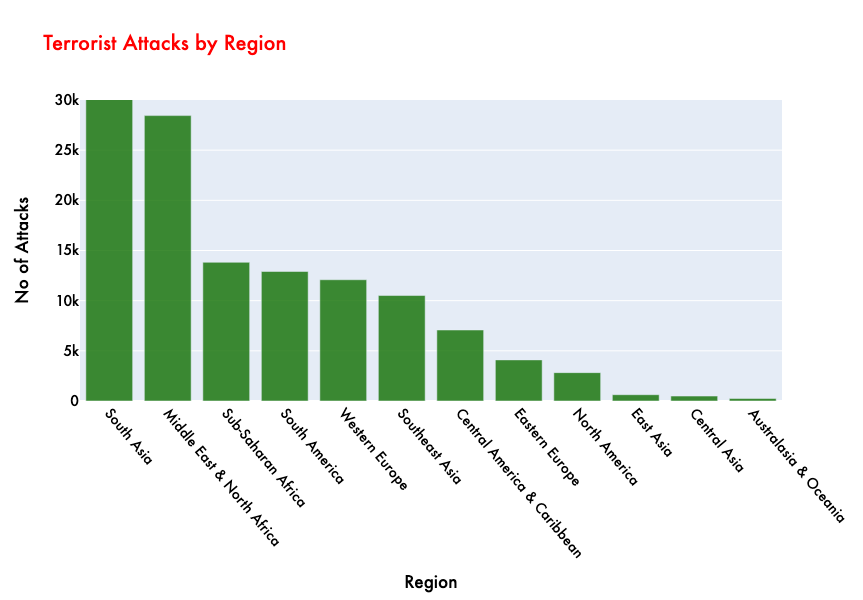

In [96]:
data2 =data.groupby("Region").size().reset_index(name='total_attacks').sort_values(by='total_attacks', ascending=False).reset_index(drop=True)

import plotly.graph_objs as go
# Creating trace1
trace1 = go.Bar(
                    x = data2.Region,
                    y = data2.total_attacks,
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))

layout = dict(title = 'Terrorist Attacks by Region',
              xaxis= dict(title= 'Region',tickangle = 50),
              yaxis= dict(title= 'No of Attacks',range = [0,30000], tickangle = 0)
             )
plot = go.Figure(data = trace1,layout = layout)


plot.update_layout(
    font_family="Futura",
    title_font_family="Futura",
    title_font_color="red",
    legend_title_font_color="green",
    font=dict(
        size=14,
        color="Black"
    ),width=800, height=600
)

plot.show()


## -3)Terrorist Attacks by Country

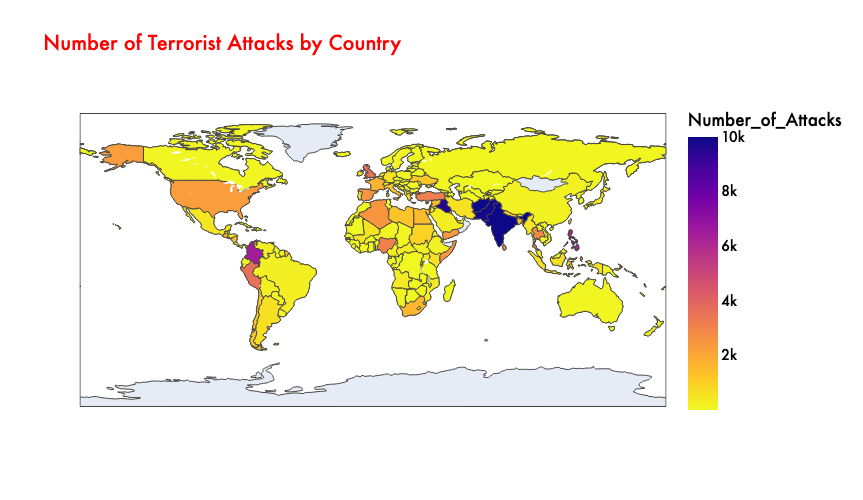

In [91]:
#World Map
geo=pd.DataFrame({'Country': data['Country'].value_counts().index,
                   'Number_of_Attacks': data['Country'].value_counts().values})

fig = px.choropleth(geo, locations="Country", 
                    locationmode="country names", color="Number_of_Attacks", 
                    hover_name="Country", range_color=[1, 10000], 
                    color_continuous_scale="plasma_r", 
                    title='Number of Terrorist Attacks by Country')
fig.update(layout_coloraxis_showscale=True)

fig.update_layout(
    font_family="Futura",
    title_font_family="Futura",
    title_font_color="red",
    legend_title_font_color="green",
    font=dict(
        size=14,
        color="Black"
    ),width=800, height=500
)

fig.show()

## -4)Top 10 Cities with most Terrorist Attacks

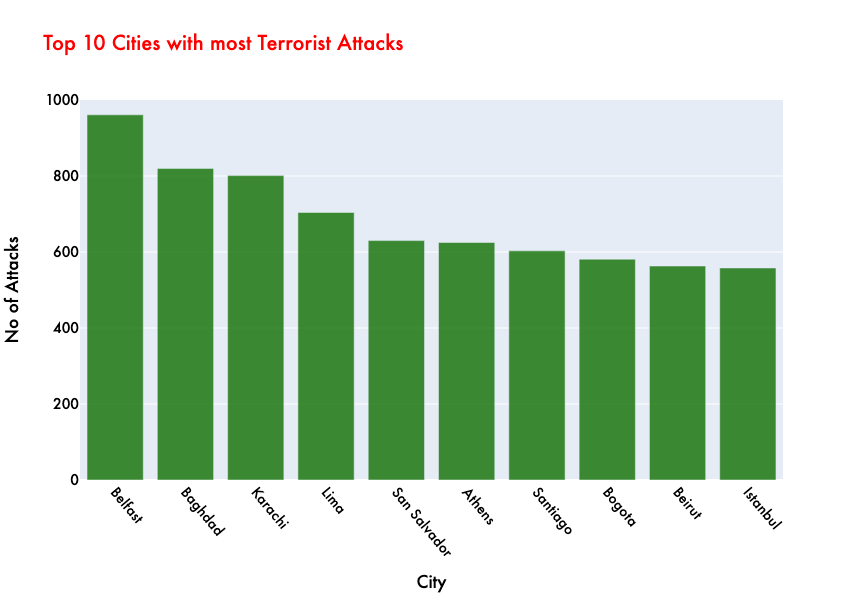

In [97]:
data2 =data.groupby("City").size().reset_index(name='total_attacks').sort_values(by='total_attacks', ascending=False).reset_index(drop=True)
data2 = data2[data2['City'] != 'Unknown']
data2 = data2[:10]
import plotly.graph_objs as go
# Creating trace1
trace1 = go.Bar(
                    x = data2.City,
                    y = data2.total_attacks,
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))

layout = dict(title = 'Top 10 Cities with most Terrorist Attacks',
              xaxis= dict(title= 'City',tickangle = 50),
              yaxis= dict(title= 'No of Attacks',range = [0,1000], tickangle = 0)
             )
plot = go.Figure(data = trace1,layout = layout)


plot.update_layout(
    font_family="Futura",
    title_font_family="Futura",
    title_font_color="red",
    legend_title_font_color="green",
    font=dict(
        size=14,
        color="Black"
    ),width=800, height=600
)

plot.show()

## -5)Top 10 Cities with most Terrorist Attacks

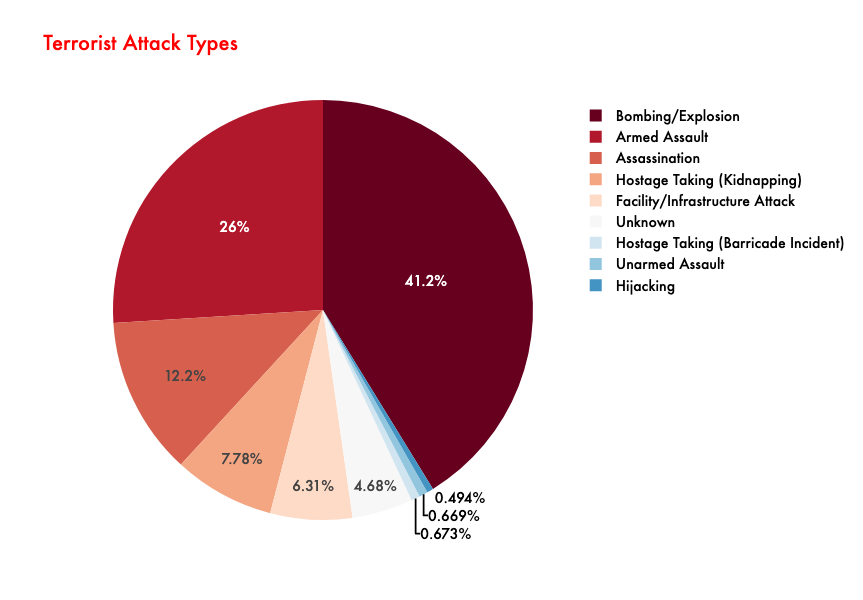

In [100]:
#Making a new column called AttackCount which is the sum of each type of terrorist attack and adding it to dataframe
data['AttackCount'] = data.Attack_Type.groupby(data.Attack_Type).transform('count')

#Creating new Dataframe to get only Attack Type and AttackCount and dropping duplicates from Attack Type
data1 = data.copy()
data2 = data1[['Attack_Type','AttackCount']]
data3 = data2.drop_duplicates(keep='first')

#Pie Chart
fig = px.pie(data3, values="AttackCount",
             names="Attack_Type",title='Terrorist Attack Types',
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_layout(
    font_family="Futura",
    title_font_family="Futura",
    title_font_color="red",
    legend_title_font_color="green",
    font=dict(
        size=14,
        color="Black"
    ),width=800, height=600
)

fig.show()

## -6)Terrorist Targets

/var/folders/y9/7jjg2kks2396zw687mh2t7vc0000gn/T/ipykernel_796/3543970765.py:5: FutureWarning:

In a future version of pandas all arguments of Series.dropna will be keyword-only



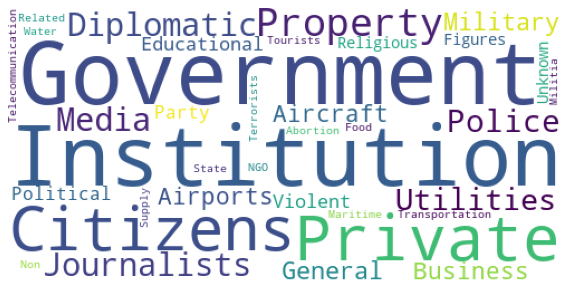

In [111]:
from wordcloud import WordCloud
#Word Cloud
data2 = data.drop_duplicates(subset =["Target_Type"])

Targets=data2.Target_Type.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud= WordCloud(background_color='white', width=500, height = 250).generate(' '.join(Targets))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## -7)Largest Terrorist Groups 

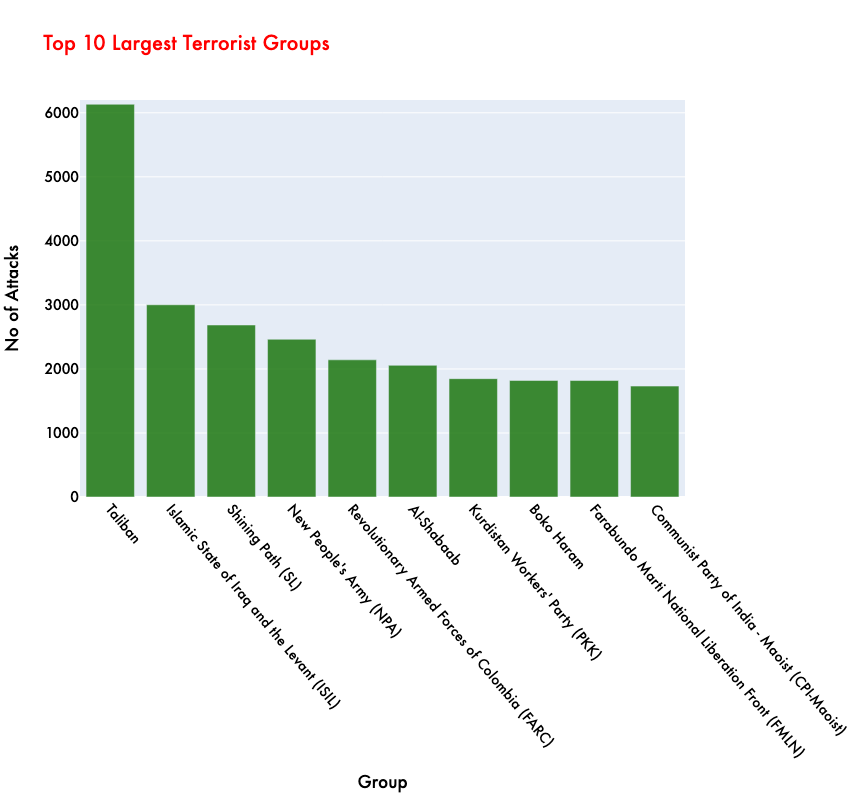

In [120]:
data = data[data['Affiliation'] != 'Unknown']
data2 =data.groupby("Affiliation").size().reset_index(name='total_attacks').sort_values(by='total_attacks', ascending=False).reset_index(drop=True)
data2 = data2[:10]
import plotly.graph_objs as go
# Creating trace1
trace1 = go.Bar(
                    x = data2.Affiliation,
                    y = data2.total_attacks,
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))

layout = dict(title = 'Top 10 Largest Terrorist Groups',
              xaxis= dict(title= 'Group',tickangle = 50),
              yaxis= dict(title= 'No of Attacks',range = [0,6200], tickangle = 0)
             )
plot = go.Figure(data = trace1,layout = layout)


plot.update_layout(
    font_family="Futura",
    title_font_family="Futura",
    title_font_color="red",
    legend_title_font_color="green",
    font=dict(
        size=14,
        color="Black"
    ),width=800, height=800
)

plot.show()


## Results and Insights

#### -Increase in global terrorist attacks after the year 2000, with the most terrorist attacks happening in 2014
####  -South Asia and Middle East & North Africa had the most terrorist attacks wiwth a total of 35,000 and 28,445 attacks from 1970-2017
#### -Countries with the most terrorist attacks were in India (10.5k), Afghanistan (10.1k), and Pakistan (9.8k)
#### -Cities with the most terrorist attacks were Belfast (961), Baghdad (820), and Kurachi (801)
#### -Most popular attacks used were bombings/explosions (41.2%), followed by armed assault (26%), and assassinations (12.2%)
#### -Terrorist targets were mainly citizens & their property, private citizens, and government general
#### -Largest terrorist organizations are the Taliban, Islamic State of Iraq and the Levant (ISIL), and Shining Path (SL)